In [1]:
import numpy as np
import utils as ut
import pandas as pd 
from collections import Counter

from sklearn import preprocessing as skp 
from sklearn import decomposition as skd
from sklearn.pipeline import Pipeline
from sklearn import metrics as skm
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('data/anomaly.csv')
df.head()

,Address,LocalPeers,RemotePeers,DevType
0,192.168.1.0,1,2,Normal
1,192.168.1.1,10,30,Normal
2,192.168.1.2,6,38,Normal
3,192.168.1.3,7,11,Normal
4,192.168.1.4,1,9,Normal


In [3]:
# Create our X and Y. 
X_Columns = ['LocalPeers','RemotePeers']
Raw_X = df[X_Columns].to_numpy()
Y = df['DevType'].tolist()

def scale_data(X):
    return skp.MinMaxScaler().fit_transform(X)

X = scale_data(Raw_X)

In [4]:
class ClusterClass:
    def __init__(self):
        self.alg = self.getAlgorithm()

    def fit(self, X):
        self.alg.fit(X)

    def predict(self, X):
        if hasattr(self.alg, "labels_"):
            y_pred = self.alg.labels_.astype(int)
        else:
            y_pred = self.alg.predict(X)
        return y_pred

    def fit_predict(self,X):
        self.fit(X)
        return self.predict(X)
        

class DBSCANClass(ClusterClass):
    def getAlgorithm(self):
        return DBSCAN()

class KMeansClass(ClusterClass):
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        super().__init__()
        
    def getAlgorithm(self):
        return KMeans(n_clusters=self.n_clusters)


class GMMClass(ClusterClass):
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        super().__init__()
        
    def getAlgorithm(self):
        return GaussianMixture(n_components=self.n_clusters)
         

In [5]:
def plot_map(X,Y,classifier,F1, F2):
    scaler = skp.MinMaxScaler()
    scaled_X = scaler.fit_transform(X)
    pred = classifier.fit_predict(X)
    pca_df = pd.DataFrame({F1:X[:,0], F2: X[:,1], 'Y':Y, 'cluster':pred})
    ut.plot_2sides(pca_df,F1, F2, 'Y', 'cluster')

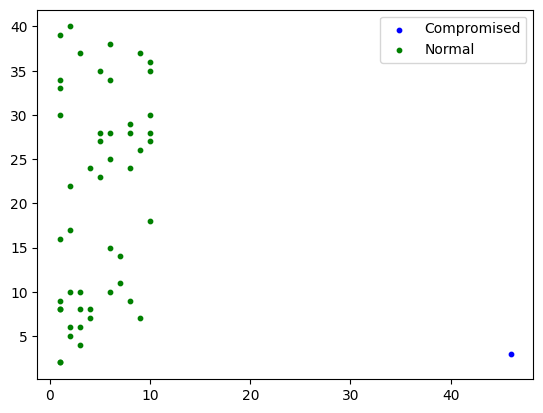

In [6]:
ut.plot_df(df, 'LocalPeers','RemotePeers','DevType')              

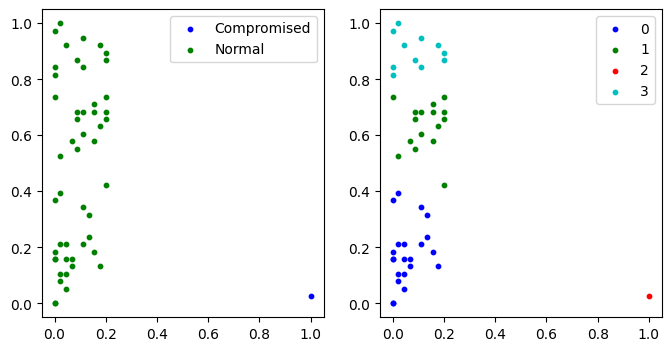

In [7]:
plot_map(X,Y,KMeansClass(n_clusters=4),'LocalPeers','RemotePeers')

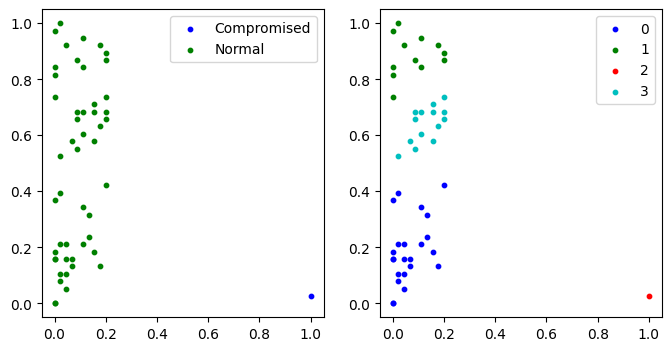

In [8]:
plot_map(X,Y,GMMClass(n_clusters=4),'LocalPeers','RemotePeers')

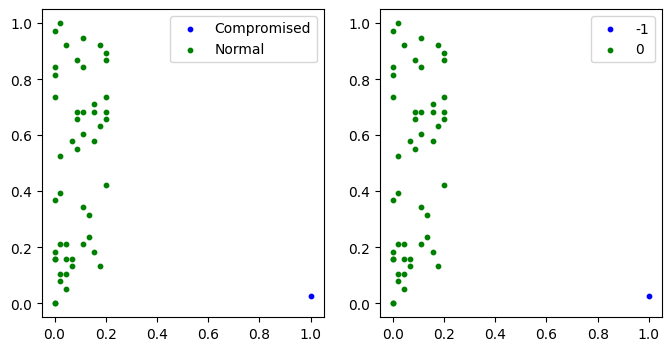

In [9]:
plot_map(X,Y,DBSCANClass(),'LocalPeers','RemotePeers')